In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insurance


In [2]:
!cp -r /kaggle/input/insurance /content/drive/MyDrive/insurance

In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for plots
sns.set(style="whitegrid")
%matplotlib inline


In [4]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/insurance/insurance/insurance.csv')

# View first 5 rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Dataset shape
print("Shape:", df.shape)

# Basic info
df.info()

# Check for missing values
df.isnull().sum()


Shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
# Numerical stats
df.describe()

# Categorical stats
df.describe(include='object')


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


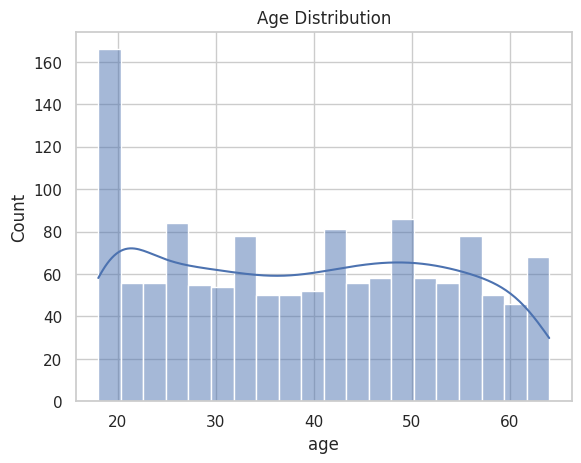

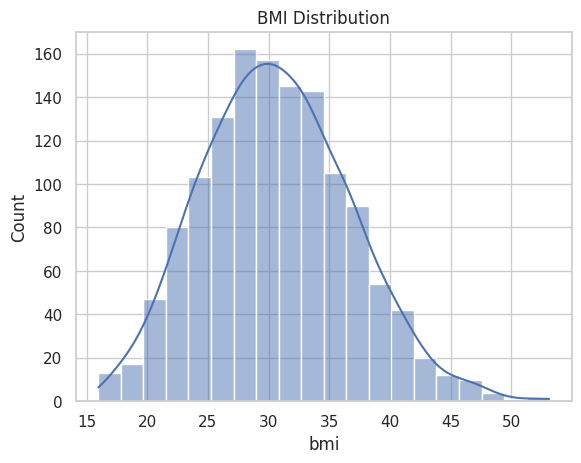

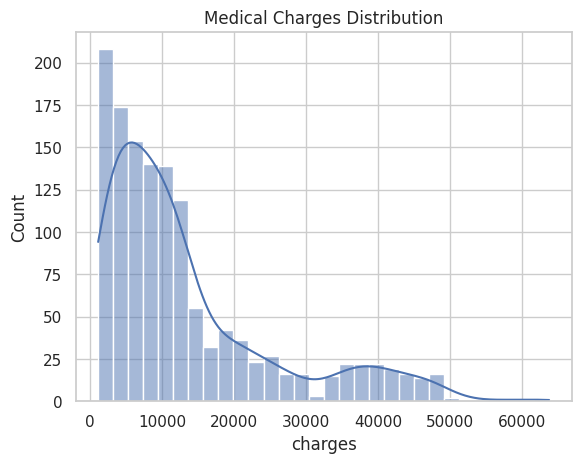

In [7]:
# Age distribution
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

# BMI distribution
sns.histplot(df['bmi'], kde=True, bins=20)
plt.title('BMI Distribution')
plt.show()

# Charges distribution
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Medical Charges Distribution')
plt.show()


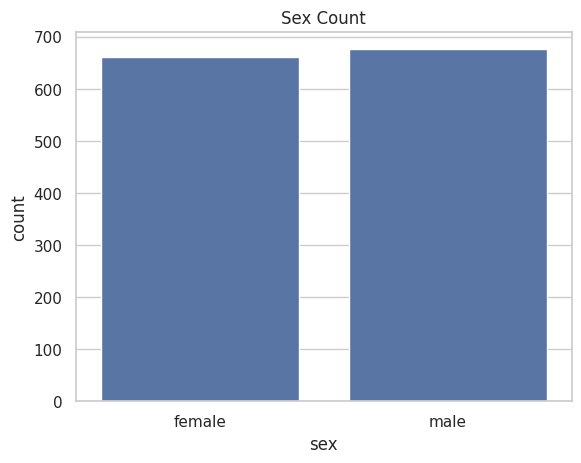

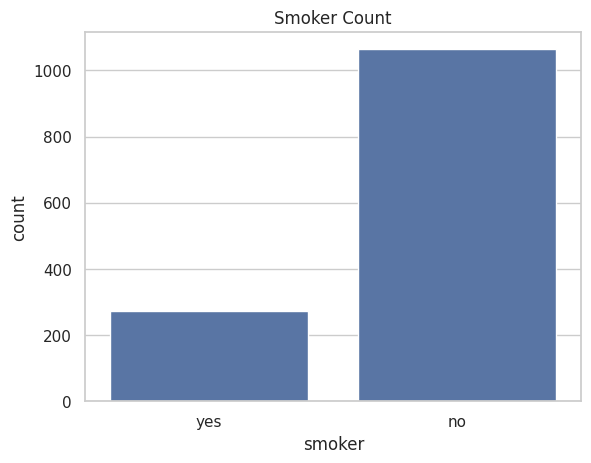

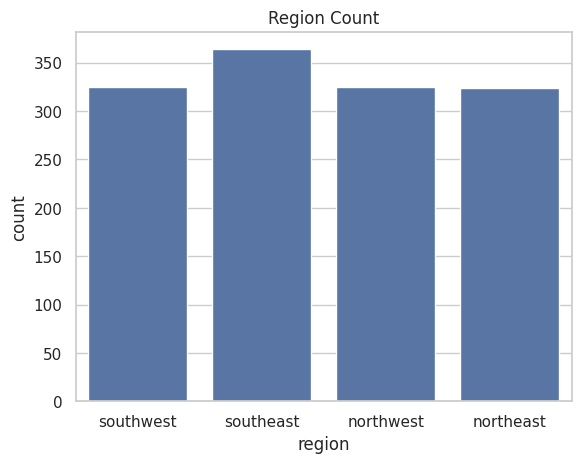

In [8]:
# Count plots for categorical variables
categoricals = ['sex', 'smoker', 'region']
for col in categoricals:
    sns.countplot(data=df, x=col)
    plt.title(f'{col.capitalize()} Count')
    plt.show()


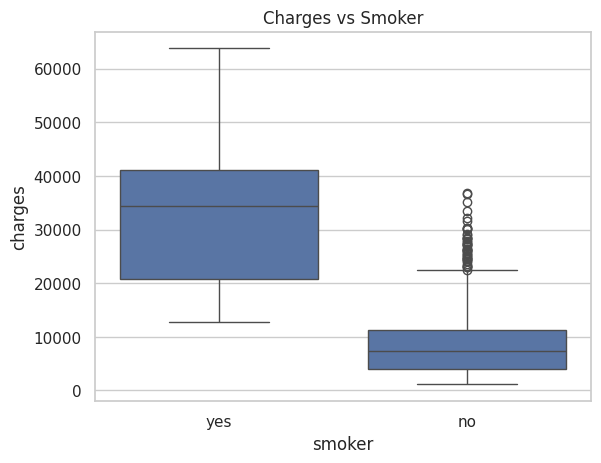

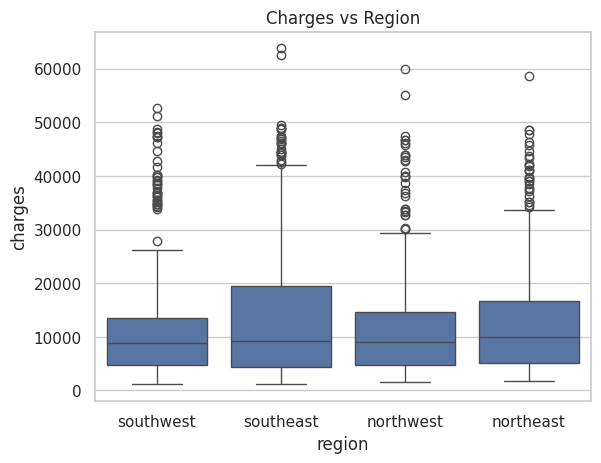

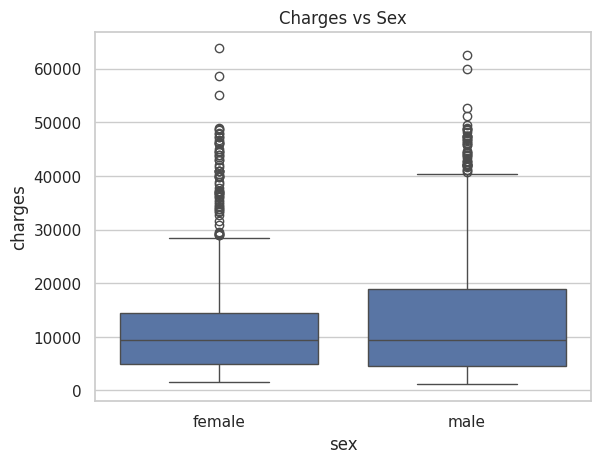

In [9]:
# Charges vs Smoker
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges vs Smoker')
plt.show()

# Charges vs Region
sns.boxplot(data=df, x='region', y='charges')
plt.title('Charges vs Region')
plt.show()

# Charges vs Sex
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Charges vs Sex')
plt.show()


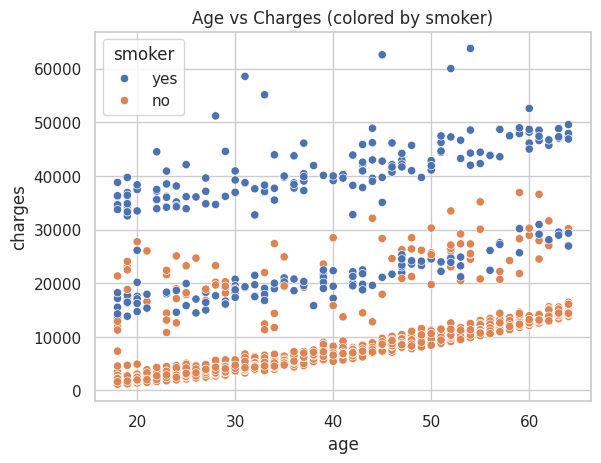

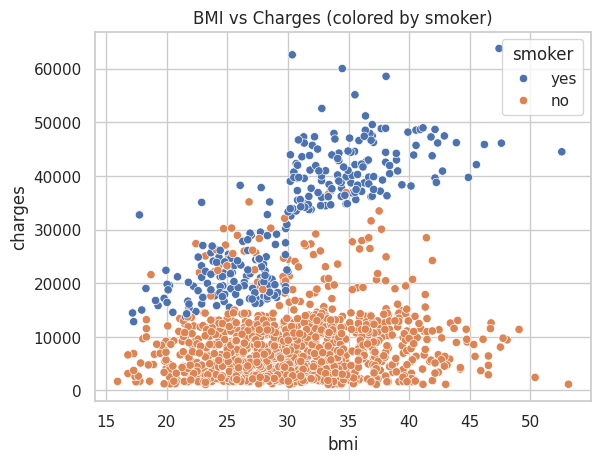

In [10]:
# Age vs Charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges (colored by smoker)')
plt.show()

# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges (colored by smoker)')
plt.show()


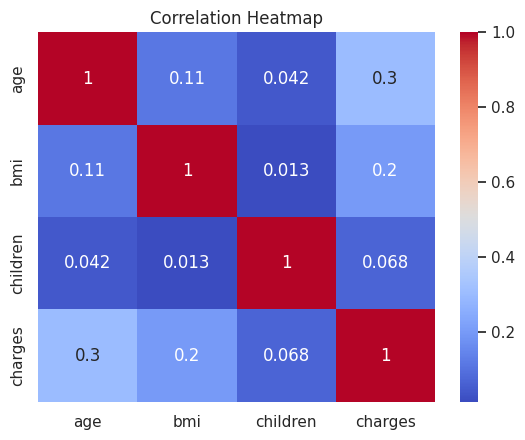

In [11]:
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# One-hot encoding of categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display encoded dataframe
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [13]:
# Features (X) and Target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


In [14]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
!pip install lazypredict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 741.4/741.4 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 17.9 MB/s eta 0:00:00


In [17]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

# Note: Use scaled features for models that require it
# You can switch X_train_scaled and X_test_scaled if you've scaled them earlier

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Display model performance
models


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 8
[LightGBM] [Info] Start training from score 13346.089733


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.88,0.88,4329.57,0.41
LGBMRegressor,0.86,0.87,4562.35,0.35
RandomForestRegressor,0.86,0.87,4567.78,0.74
HistGradientBoostingRegressor,0.86,0.86,4608.52,0.54
BaggingRegressor,0.85,0.86,4709.06,0.14
XGBRegressor,0.84,0.85,4840.94,2.01
ExtraTreesRegressor,0.84,0.84,4922.41,0.96
AdaBoostRegressor,0.82,0.82,5267.06,0.07
KNeighborsRegressor,0.80,0.80,5519.05,0.05


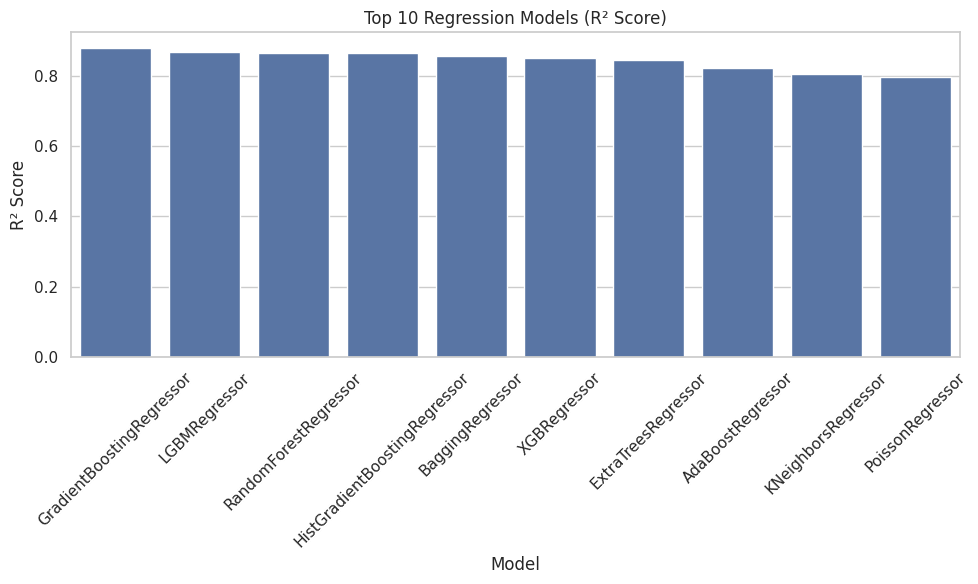

In [18]:
# Plot R-squared values of top 10 models
top_models = models.sort_values("R-Squared", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.index, y=top_models["R-Squared"])
plt.title("Top 10 Regression Models (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=100)

# Fit the model on training data (scaled or unscaled — works well with both)
gb_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor(random_state=100)

In [20]:
# Predict on test data
y_pred = gb_model.predict(X_test_scaled)


In [21]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"📊 GradientBoostingRegressor Performance:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 GradientBoostingRegressor Performance:
MAE:  2457.48
MSE:  18806730.47
RMSE: 4336.67
R² Score: 0.8789


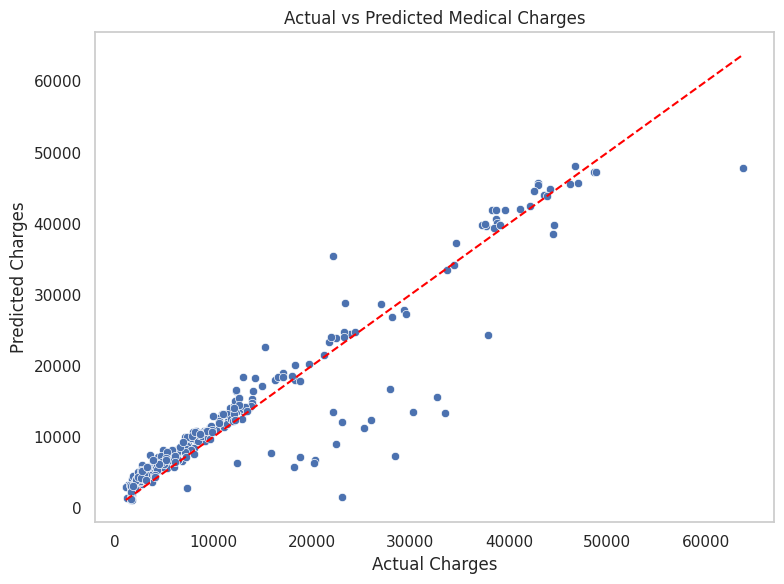

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid()
plt.tight_layout()
plt.show()


In [23]:
import joblib

# Save the model
joblib.dump(gb_model, 'gradient_boost_model.pkl')

# Save the scaler too
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.9 MB/s eta 0:00:00


In [25]:
import os

print("Model exists:", os.path.exists('gradient_boost_model.pkl'))
print("Scaler exists:", os.path.exists('scaler.pkl'))


Model exists: True
Scaler exists: True


In [26]:
import joblib

# Assuming you have gb_model and scaler trained already
joblib.dump(gb_model, 'gradient_boost_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [27]:
os.path.exists('gradient_boost_model.pkl')  # Should return True




True

In [28]:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
 'region_northeast', 'region_northwest', 'region_southeast']


['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast']

In [30]:
!cp /content/drive/MyDrive/healthcare_model/gradient_boost_model.pkl .
!cp /content/drive/MyDrive/healthcare_model/scaler.pkl .


cp: cannot stat '/content/drive/MyDrive/healthcare_model/gradient_boost_model.pkl': No such file or directory
cp: cannot stat '/content/drive/MyDrive/healthcare_model/scaler.pkl': No such file or directory


In [31]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
import os

st.set_page_config(page_title="Healthcare Cost Predictor")
st.title("🏥 Healthcare Cost Predictor")
st.write("Estimate your expected medical charges based on lifestyle and demographics.")

# Load model and scaler
if not os.path.exists('gradient_boost_model.pkl') or not os.path.exists('scaler.pkl'):
    st.error("Model or Scaler file not found.")
else:
    model = joblib.load('gradient_boost_model.pkl')
    scaler = joblib.load('scaler.pkl')

    # Inputs
    age = st.slider("Age", 18, 65, 30)
    bmi = st.slider("BMI", 10.0, 50.0, 25.0)
    children = st.slider("Number of Children", 0, 5, 1)
    sex = st.selectbox("Sex", ["male", "female"])
    smoker = st.selectbox("Do you smoke?", ["yes", "no"])
    region = st.selectbox("Region", ["southeast", "southwest", "northeast", "northwest"])

    # One-hot encode inputs
    sex_male = 1 if sex == "male" else 0
    smoker_yes = 1 if smoker == "yes" else 0
    region_ne = 1 if region == "northeast" else 0
    region_nw = 1 if region == "northwest" else 0
    region_se = 1 if region == "southeast" else 0

    features = np.array([[age, bmi, children, sex_male, smoker_yes,
                          region_ne, region_nw, region_se]])
    features_scaled = scaler.transform(features)

    if st.button("Predict Medical Cost"):
        prediction = model.predict(features_scaled)[0]
        st.success(f"💰 Estimated Medical Cost: ₹{prediction:,.2f}")


Writing app.py


In [32]:
!pip install streamlit pyngrok --quiet


In [33]:
from pyngrok import ngrok

ngrok.set_auth_token("2xrXtDlKunOty6caPQwHUHzmrM7_67QQqDXMN18zeJQHtWap1")


In [34]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
import os

st.set_page_config(page_title="Healthcare Cost Predictor")
st.title("🏥 Healthcare Cost Predictor")
st.write("Estimate your expected medical charges based on lifestyle and demographics.")

if not os.path.exists('gradient_boost_model.pkl') or not os.path.exists('scaler.pkl'):
    st.error("❌ Model or Scaler file not found.")
else:
    model = joblib.load('gradient_boost_model.pkl')
    scaler = joblib.load('scaler.pkl')

    age = st.slider("Age", 18, 65, 30)
    bmi = st.slider("BMI", 10.0, 50.0, 25.0)
    children = st.slider("Number of Children", 0, 5, 1)
    sex = st.selectbox("Sex", ["male", "female"])
    smoker = st.selectbox("Do you smoke?", ["yes", "no"])
    region = st.selectbox("Region", ["southeast", "southwest", "northeast", "northwest"])

    sex_male = 1 if sex == "male" else 0
    smoker_yes = 1 if smoker == "yes" else 0
    region_ne = 1 if region == "northeast" else 0
    region_nw = 1 if region == "northwest" else 0
    region_se = 1 if region == "southeast" else 0

    features = np.array([[age, bmi, children, sex_male, smoker_yes,
                          region_ne, region_nw, region_se]])
    features_scaled = scaler.transform(features)

    if st.button("Predict Medical Cost"):
        prediction = model.predict(features_scaled)[0]
        st.success(f"💰 Estimated Medical Cost: ₹{prediction:,.2f}")


Overwriting app.py


In [35]:
!cp /content/drive/MyDrive/your_folder/gradient_boost_model.pkl .
!cp /content/drive/MyDrive/your_folder/scaler.pkl .


cp: cannot stat '/content/drive/MyDrive/your_folder/gradient_boost_model.pkl': No such file or directory
cp: cannot stat '/content/drive/MyDrive/your_folder/scaler.pkl': No such file or directory


In [36]:
import time
import threading
import os
from pyngrok import ngrok

# (Optional) Kill existing sessions
!pkill streamlit

# 🔐 Set your ngrok auth token (run once)
ngrok.set_auth_token("2xrXtDlKunOty6caPQwHUHzmrM7_67QQqDXMN18zeJQHtWap1")

# 🟢 Run Streamlit app in background
def run():
    os.system("streamlit run app.py")

threading.Thread(target=run).start()
time.sleep(10)

# 🌐 Start the tunnel
public_url = ngrok.connect(addr="8501", proto="http")
print("✅ Streamlit app is live at:", public_url)


✅ Streamlit app is live at: NgrokTunnel: "https://612a14107c28.ngrok-free.app" -> "http://localhost:8501"
